In [15]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

In [2]:
d = xr.open_dataset('../../data/netcdf/GLORYSv12/Cgrid/daily/GLORYS12-daily-gridV-0.nc')

In [3]:
d

<xarray.Dataset>
Dimensions:       (deptht: 50, time_counter: 1, y: 3059, x: 4322)
Coordinates:
  * deptht        (deptht) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * time_counter  (time_counter) datetime64[ns] 1992-12-30T12:00:00
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
Dimensions without coordinates: y, x
Data variables:
    vomecrty      (time_counter, deptht, y, x) float32 ...
Attributes:
    Conventions:  CF-1.0
    file_name:    GLORYS12V1_y2020m05d30_gridV.nc
    institution:  MERCATOR OCEAN
    source:       NEMO
    TimeStamp:    2021-SEP-02 22:10:59 GMT-0000
    references:   http://www.mercator-ocean.eu

In [4]:
lon=d.nav_lon
lat=d.nav_lat
v=d.vomecrty.isel(deptht=0,time_counter=0)

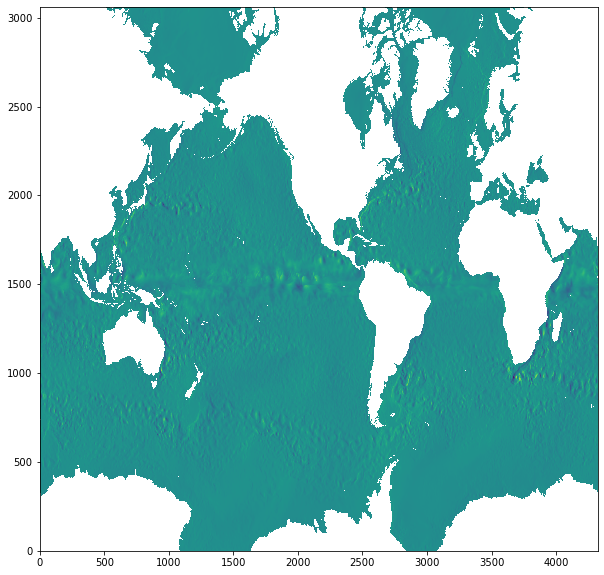

In [5]:
fig,ax=plt.subplots(1,1,figsize=(10,10))

ax.pcolormesh( v)

In [6]:
dnew = d.isel(y=slice(1500,3059))

In [7]:
dnew

<xarray.Dataset>
Dimensions:       (deptht: 50, time_counter: 1, y: 1559, x: 4322)
Coordinates:
  * deptht        (deptht) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * time_counter  (time_counter) datetime64[ns] 1992-12-30T12:00:00
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
Dimensions without coordinates: y, x
Data variables:
    vomecrty      (time_counter, deptht, y, x) float32 ...
Attributes:
    Conventions:  CF-1.0
    file_name:    GLORYS12V1_y2020m05d30_gridV.nc
    institution:  MERCATOR OCEAN
    source:       NEMO
    TimeStamp:    2021-SEP-02 22:10:59 GMT-0000
    references:   http://www.mercator-ocean.eu

In [8]:
vnew=dnew.vomecrty.isel(deptht=0,time_counter=0)

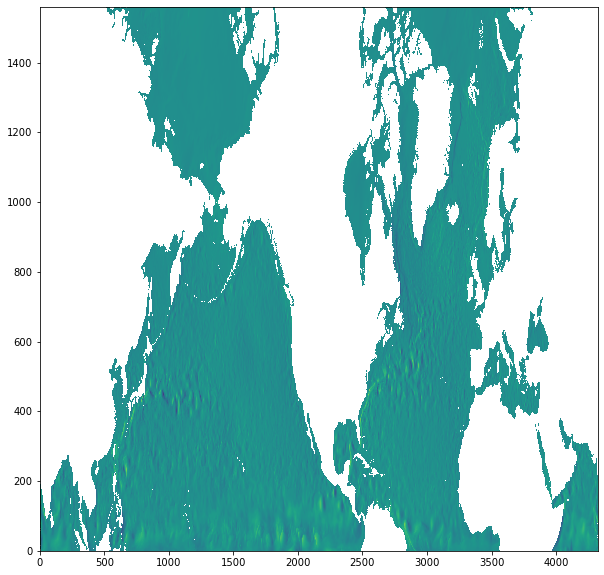

In [9]:
fig,ax=plt.subplots(1,1,figsize=(10,10))

ax.pcolormesh( vnew)

In [10]:
d.close()
dnew.close()

# subsetting to test with ariane

In [27]:
dir_name='../../data/netcdf/GLORYSv12/Cgrid/daily/'
files = glob.glob(f'{dir_name}/*.nc')
print(files)

['../../data/netcdf/GLORYSv12/Cgrid/daily/GLORYS12-daily-gridV-0.nc', '../../data/netcdf/GLORYSv12/Cgrid/daily/GLORYS12-daily-gridU-0.nc', '../../data/netcdf/GLORYSv12/Cgrid/daily/GLORYS12-daily-gridU-1.nc', '../../data/netcdf/GLORYSv12/Cgrid/daily/GLORYS12-daily-gridV-1.nc']


In [28]:
for f in files:
    d = xr.open_dataset(f)
    dnew=d.isel(y=slice(1500,3059))
    fname=os.path.basename(f)
    fname=f'{dir_name}/subset/{fname}'
    dnew.to_netcdf(fname)

## mesh

In [17]:
files=glob.glob('../../data/netcdf/GLORYSv12/Cgrid/PSY4V3R1*')

In [18]:
files

['../../data/netcdf/GLORYSv12/Cgrid/PSY4V3R1_mesh_hgr.nc',
 '../../data/netcdf/GLORYSv12/Cgrid/PSY4V3R1_mask.nc',
 '../../data/netcdf/GLORYSv12/Cgrid/PSY4V3R1_mesh_zgr.nc']

In [19]:
for f in files:
    d = xr.open_dataset(f)
    dnew=d.isel(y=slice(1500,3059))
    fname=os.path.basename(f)
    fname=f'{dir_name}/subset/{fname}'
    dnew.to_netcdf(fname)

In [20]:
dmask=xr.open_dataset('../../data/netcdf/GLORYSv12/Cgrid/daily/subset/PSY4V3R1_mask.nc')
dhgr=xr.open_dataset('../../data/netcdf/GLORYSv12/Cgrid/daily/subset/PSY4V3R1_mesh_hgr.nc')
dzgr=xr.open_dataset('../../data/netcdf/GLORYSv12/Cgrid/daily/subset/PSY4V3R1_mesh_zgr.nc')

In [23]:
dnew = xr.merge([dmask,dhgr,dzgr])

In [24]:
dnew

<xarray.Dataset>
Dimensions:       (y: 1559, x: 4322, z: 50, t: 1)
Dimensions without coordinates: y, x, z, t
Data variables: (12/38)
    nav_lon       (y, x) float32 72.92 73.0 73.08 73.17 ... 73.0 73.0 73.0 73.0
    nav_lat       (y, x) float32 0.5 0.5 0.5 0.5 0.5 ... 50.0 50.0 50.0 50.0
    nav_lev       (z) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
    time_counter  (t) float64 0.0
    tmask         (t, z, y, x) uint8 ...
    umask         (t, z, y, x) uint8 ...
    ...            ...
    e3t_ps        (t, y, x) float64 ...
    e3w_ps        (t, y, x) float64 ...
    gdept_0       (t, z) float64 ...
    gdepw_0       (t, z) float64 ...
    e3t_0         (t, z) float64 ...
    e3w_0         (t, z) float64 ...
Attributes:
    file_name:                       mask.nc
    TimeStamp:                       03/02/2016 10:18:37 -0000
    DODS_EXTRA.Unlimited_Dimension:  t

In [25]:
dnew.to_netcdf(f'{dir_name}/subset/PSY4V3R1_mesh_mask.nc')